In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
players = pd.read_csv("player_data.csv")
print("csv 파일 정보 \n")
print(players)

csv 파일 정보 

     Unnamed: 0       name  speed  shoot  pass  dribble  defense  physical
0             0     리오넬 메시    100     95    95      103       41        72
1             1  R. 레반도프스키     91    101    83       96       44        91
2             2     라힘 스털링    105     93    89       99       57        72
3             3    모하메드 살라    105     96    89       99       50        83
4             4    킬리안 음바페    106     97    82      101       41        89
5             5     카림 벤제마     90     96    90       96       50        85
6             6    L. 수아레스     90    100    90       94       57        91
7             7     토니 크로스     84     90   102       94       80        83
8             8    케일러 나바스    102     93    87      102       56        95
9             9        손흥민    103     98    87       98       56        87
10           10      해리 케인     88     99    85       93       51        93
11           11    버질 반데이크     95     71    80       82       98        97
12           

In [12]:
feature = players[["speed", "shoot", "pass", "dribble", "defense", "physical"]]
name = players["name"]

print(feature)

     speed  shoot  pass  dribble  defense  physical
0      100     95    95      103       41        72
1       91    101    83       96       44        91
2      105     93    89       99       57        72
3      105     96    89       99       50        83
4      106     97    82      101       41        89
5       90     96    90       96       50        85
6       90    100    90       94       57        91
7       84     90   102       94       80        83
8      102     93    87      102       56        95
9      103     98    87       98       56        87
10      88     99    85       93       51        93
11      95     71    80       82       98        97
12     106     91    90      100       55        90
13      98     98    76       98       43        92
14      98     95    96       99       71        97
15      98     94    87       99       40        72
16      81     64    84       84       98        89
17      98     92    95       97       53        80
18      90  

In [13]:
model = KMeans(n_clusters=3)
model.fit(feature)
result_kmeans = model.predict(feature)

In [6]:
print(result_kmeans)

[2 0 2 2 0 0 0 1 0 0]


In [14]:
predict = pd.DataFrame(result_kmeans)
predict.columns = ['predict']

In [8]:
predict

,predict
0,2
1,0
2,2
3,2
4,0
5,0
6,0
7,1
8,0
9,0


In [15]:
r = pd.concat([feature, predict], axis=1)
r

,speed,shoot,pass,dribble,defense,physical,predict
0,100,95,95,103,41,72,2
1,91,101,83,96,44,91,2
2,105,93,89,99,57,72,2
3,105,96,89,99,50,83,2
4,106,97,82,101,41,89,2
5,90,96,90,96,50,85,2
6,90,100,90,94,57,91,2
7,84,90,102,94,80,83,1
8,102,93,87,102,56,95,2
9,103,98,87,98,56,87,2


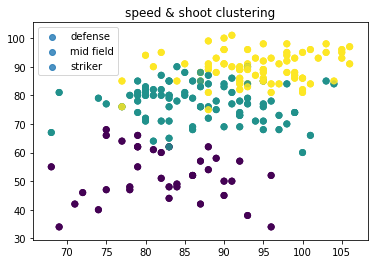

In [37]:
centers = pd.DataFrame(model.cluster_centers_, columns = ['speed', 'shoot', 'pass', 'dribble', 'defense', 'physical'])
center_x = centers['speed']
center_y = centers['shoot']

labels = ["defense", "mid field", "striker"]
colors = ['green', 'orange', 'steelblue']
markers = ['o', 'x', '^']
for i, label in enumerate(labels):
    plt.scatter(r['speed'],r['shoot'], c=r['predict'], alpha = 0.8, label=label)
    #plt.scatter(r['speed'],r['shoot'], c=r['predict'], alpha = 0.8, marker=markers[i], label=label)
    #plt.scatter(center_x, center_y, s=50, marker='D', c='g', label=label)

#plt.scatter(r['speed'],r['shoot'], c=r['predict'], alpha = 0.8)
#plt.scatter(center_x, center_y, s=50, marker='D', c='g')
plt.title("speed & shoot clustering")
plt.legend(loc='upper left')
plt.show()

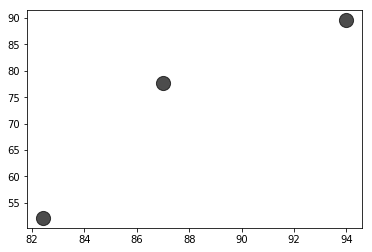

In [17]:
center_dots = model.cluster_centers_
plt.scatter(center_dots[:, 0], center_dots[:, 1], c="black", s=200, alpha=0.7)

In [18]:
# 다차원 결과를 2차원으로 축소해서 확인
from sklearn.manifold import TSNE

feature_df = pd.DataFrame(feature)

transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

(200, 2)

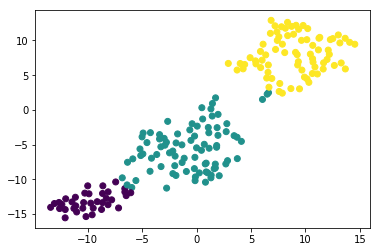

In [19]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=r['predict'])  #라벨은 색상으로 분류됨

plt.show()

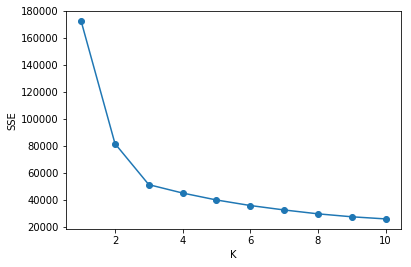

In [21]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto')
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature)